In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21197 entries, 0 to 21196
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21197 non-null  int64  
 1   date           21197 non-null  object 
 2   price          21197 non-null  float64
 3   bedrooms       21197 non-null  int64  
 4   bathrooms      21197 non-null  float64
 5   sqft_living    21197 non-null  int64  
 6   sqft_lot       21197 non-null  int64  
 7   floors         21197 non-null  float64
 8   waterfront     21197 non-null  int64  
 9   view           21197 non-null  int64  
 10  condition      21197 non-null  int64  
 11  grade          21197 non-null  int64  
 12  sqft_above     21197 non-null  int64  
 13  sqft_basement  21197 non-null  int64  
 14  yr_built       21197 non-null  int64  
 15  yr_renovated   21197 non-null  int64  
 16  zipcode        21197 non-null  int64  
 17  lat            21197 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.119700e+04,2.119700e+04,21197.000000,21197.000000,21197.000000,2.119700e+04,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000
mean,4.581117e+09,5.404147e+05,3.371515,2.116207,2081.047412,1.509942e+04,1.495330,0.007643,0.233854,3.408596,7.657452,1789.234892,291.812521,1971.055668,84.928575,98077.890692,47.560032,-122.213924,1986.669198,12787.439543
std,2.875144e+09,3.676261e+05,0.931594,0.770691,919.723922,4.149658e+04,0.540711,0.087089,0.765782,0.650393,1.175683,828.868120,443.244003,29.413922,402.873805,53.478327,0.138549,0.140874,686.170385,27412.327251
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124069e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308600e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#New Dataframe
df1=df.drop(columns = ['date'])
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21192,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21193,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21194,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21195,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Same Descripe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21197 entries, 0 to 21196
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21197 non-null  int64  
 1   price          21197 non-null  float64
 2   bedrooms       21197 non-null  int64  
 3   bathrooms      21197 non-null  float64
 4   sqft_living    21197 non-null  int64  
 5   sqft_lot       21197 non-null  int64  
 6   floors         21197 non-null  float64
 7   waterfront     21197 non-null  int64  
 8   view           21197 non-null  int64  
 9   condition      21197 non-null  int64  
 10  grade          21197 non-null  int64  
 11  sqft_above     21197 non-null  int64  
 12  sqft_basement  21197 non-null  int64  
 13  yr_built       21197 non-null  int64  
 14  yr_renovated   21197 non-null  int64  
 15  zipcode        21197 non-null  int64  
 16  lat            21197 non-null  float64
 17  long           21197 non-null  float64
 18  sqft_l

In [ ]:
#Convert them to aNumpy array excpt for some columns
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [ ]:
# lets calculate the count of unique values in the ('price', 'bathroom','bedrooms','view')
df1['price'].value_counts()

450000.0    169
350000.0    166
550000.0    157
500000.0    148
325000.0    146
           ... 
713250.0      1
151600.0      1
376500.0      1
404600.0      1
402101.0      1
Name: price, Length: 3584, dtype: int64

In [ ]:
df1['bedrooms'].value_counts()

3     9630
4     6753
2     2705
5     1568
6      270
1      196
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
df1['bathrooms'].value_counts()

2.50    5283
1.00    3775
1.75    2979
2.25    2005
2.00    1895
1.50    1416
2.75    1163
3.00     739
3.50     720
3.25     582
3.75     152
4.00     134
4.50      99
4.25      78
0.75      70
4.75      23
5.00      21
5.25      13
0.00       9
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
df1['view'].value_counts()

0    19117
2      944
3      494
1      327
4      315
Name: view, dtype: int64

In [ ]:
for i in df1.columns:
    print(df1[i].value_counts())

795000620     3
1254200015    2
2561340020    2
7520000520    2
8062900070    2
             ..
2571910380    1
255370420     1
3582750170    1
2817260130    1
1523300157    1
Name: id, Length: 21021, dtype: int64
450000.0    169
350000.0    166
550000.0    157
500000.0    148
325000.0    146
           ... 
713250.0      1
151600.0      1
376500.0      1
404600.0      1
402101.0      1
Name: price, Length: 3584, dtype: int64
3     9630
4     6753
2     2705
5     1568
6      270
1      196
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5283
1.00    3775
1.75    2979
2.25    2005
2.00    1895
1.50    1416
2.75    1163
3.00     739
3.50     720
3.25     582
3.75     152
4.00     134
4.50      99
4.25      78
0.75      70
4.75      23
5.00      21
5.25      13
0.00       9
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: ba

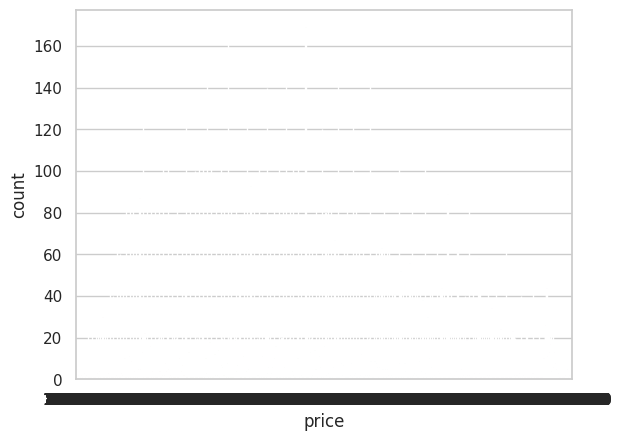

In [ ]:

sns.set(style="whitegrid")
ax = sns.countplot(data=df1, x='price')
ax.set_ylabel("count")

ax.set_xlabel("price")

plt.show()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

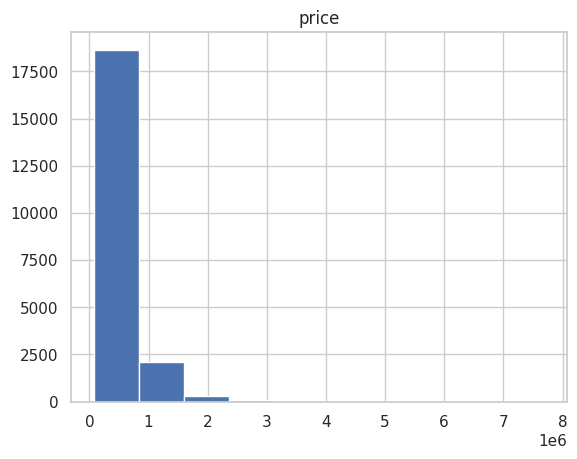

In [ ]:
df.hist('price')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

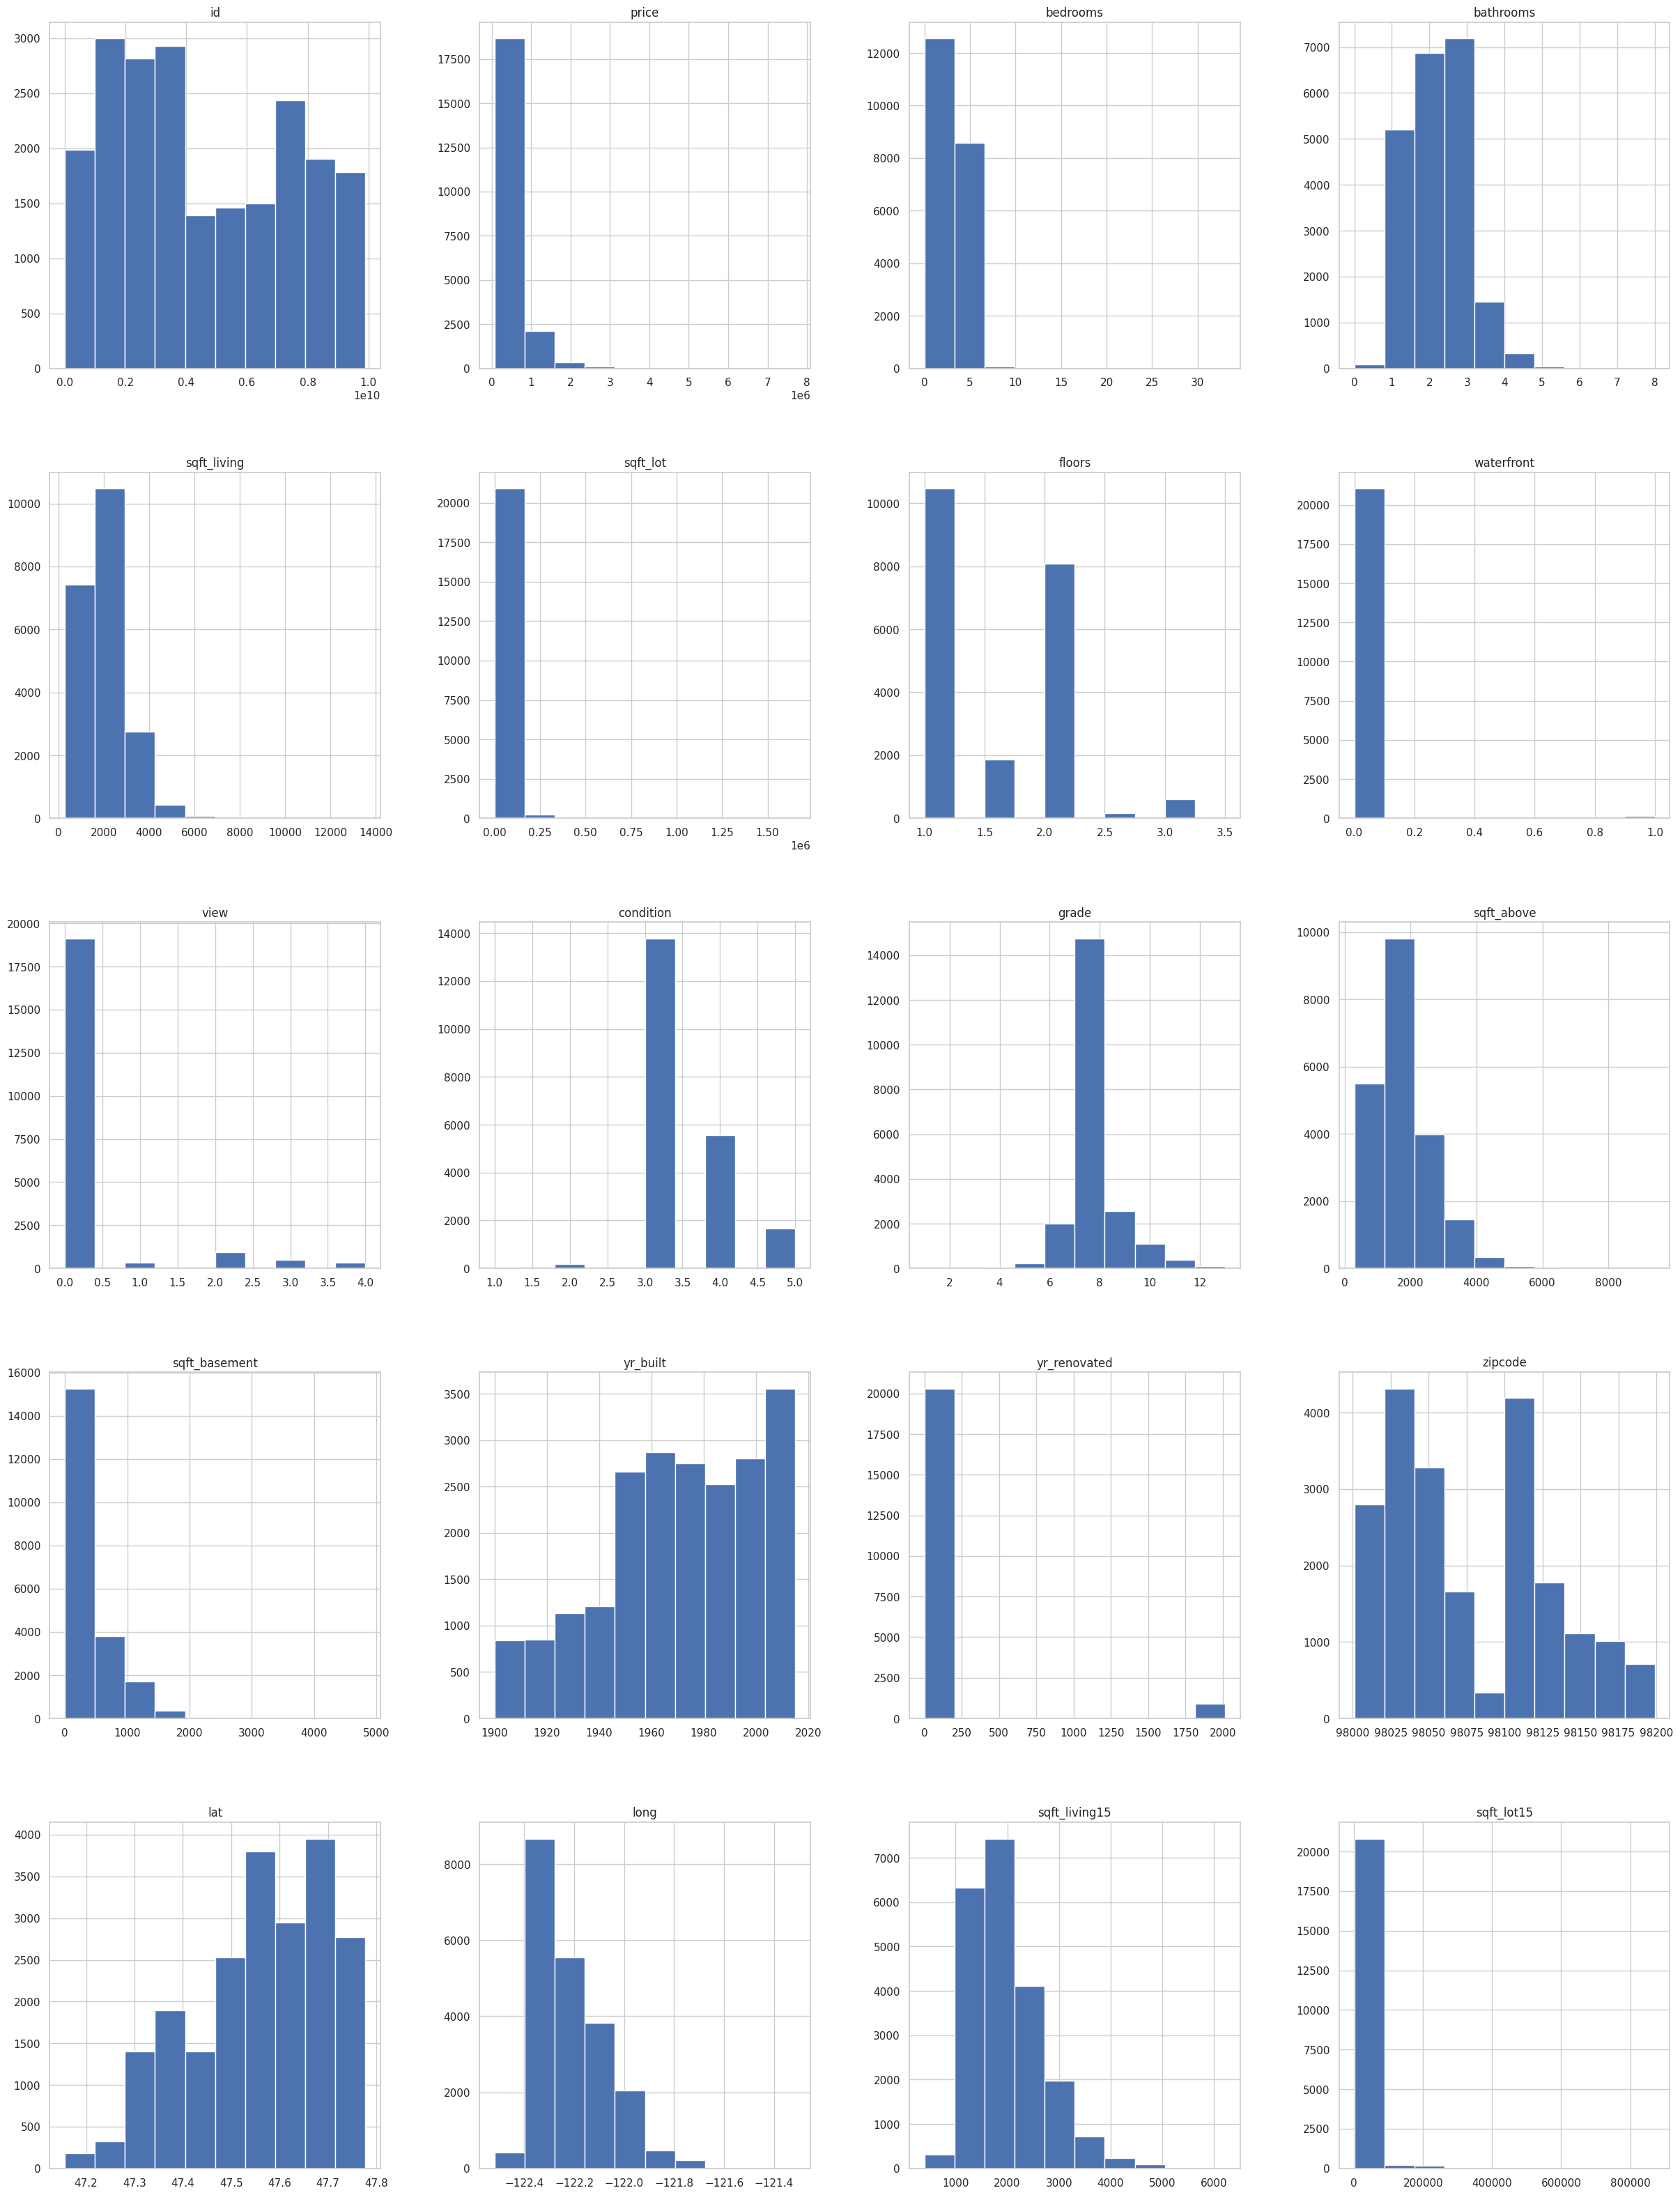

In [ ]:
df1.hist(figsize=(30,40))

<ipython-input-29-ab7b2d295fd6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price'])


<Axes: xlabel='price', ylabel='Density'>

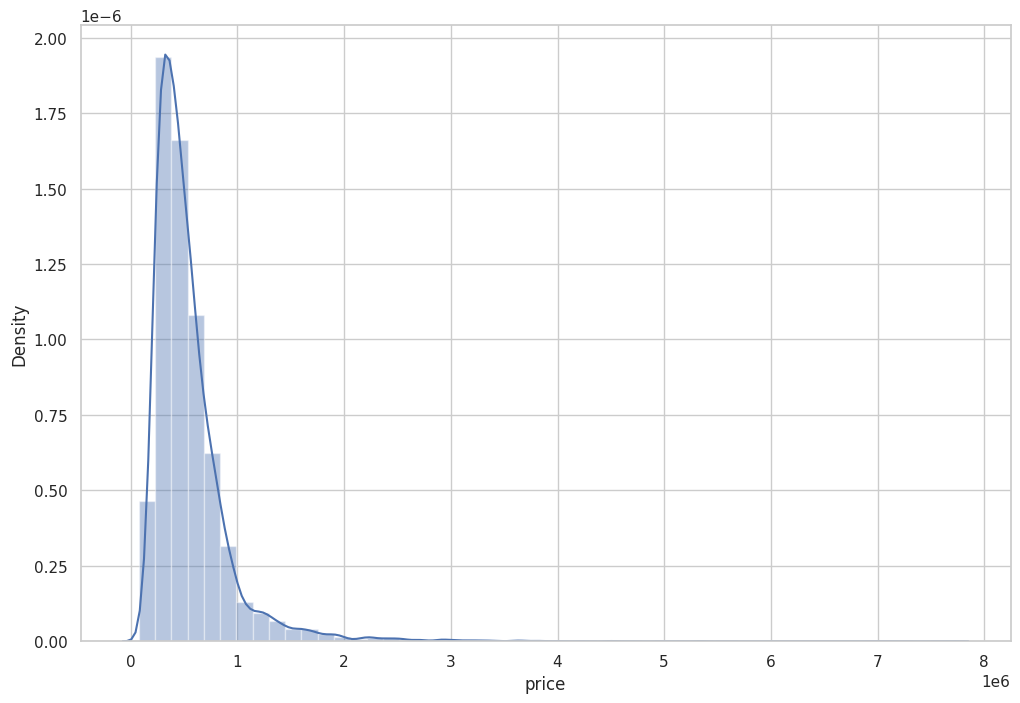

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df1['price'])

<ipython-input-30-87d5a983261d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['id'])


<Axes: xlabel='id', ylabel='Density'>

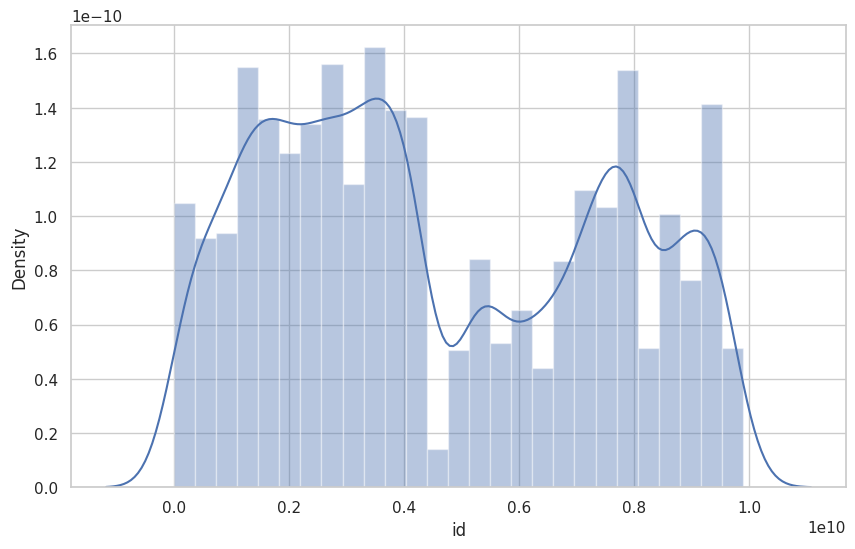

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df1['id'])

<ipython-input-31-d51350e95f48>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

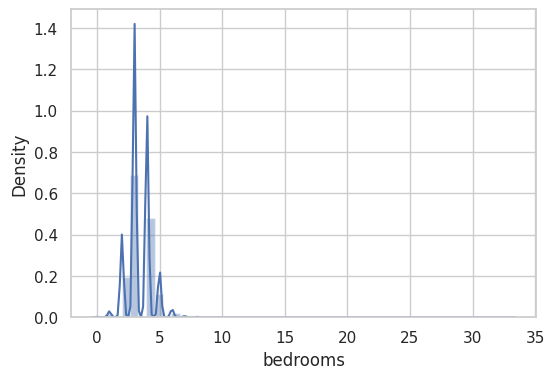

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['bedrooms'])

<ipython-input-32-248bf06c79b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['bathrooms'])


<Axes: xlabel='bathrooms', ylabel='Density'>

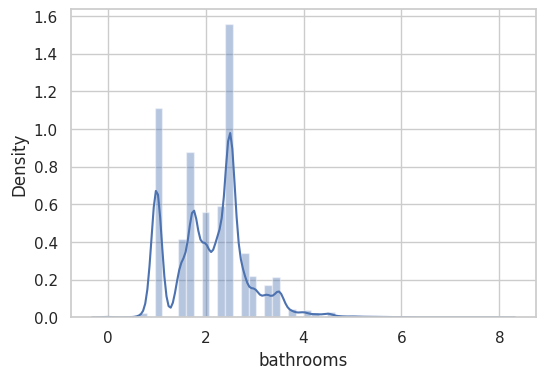

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['bathrooms'])

<ipython-input-33-3c6ec5b34570>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sqft_living'])


<Axes: xlabel='sqft_living', ylabel='Density'>

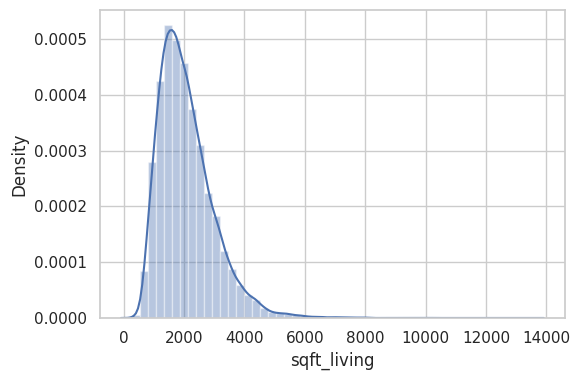

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['sqft_living'])

<ipython-input-34-011cd21106a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sqft_lot'])


<Axes: xlabel='sqft_lot', ylabel='Density'>

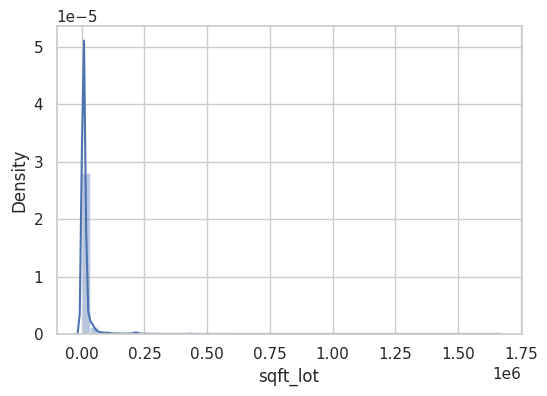

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['sqft_lot'])

<ipython-input-35-fefcf85b76ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['grade'])


<Axes: xlabel='grade', ylabel='Density'>

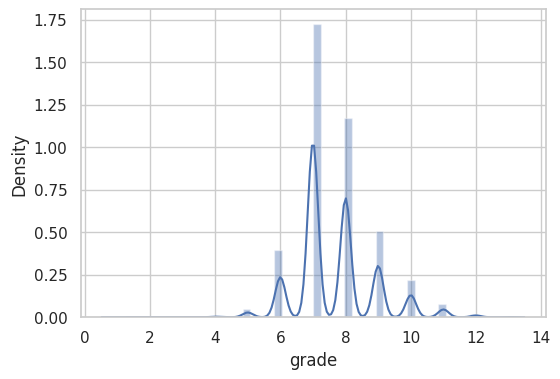

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['grade'])

<ipython-input-36-f78ffaf09d08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['lat'])


<Axes: xlabel='lat', ylabel='Density'>

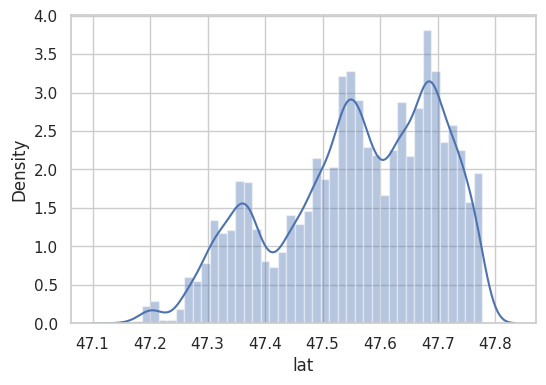

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['lat'])

<ipython-input-37-a5d2ec85ddcd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['condition'])


<Axes: xlabel='condition', ylabel='Density'>

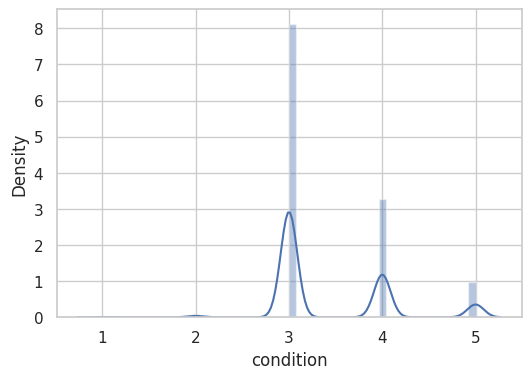

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['condition'])

<ipython-input-38-29c15d77194f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['floors'])


<Axes: xlabel='floors', ylabel='Density'>

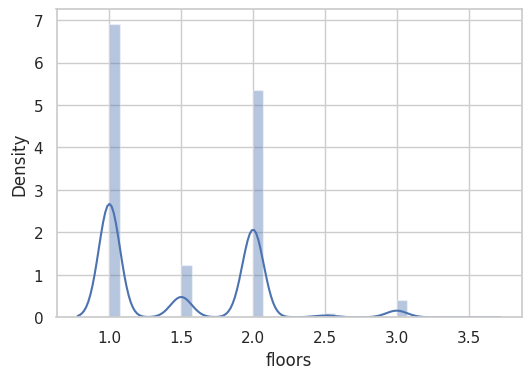

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df1['floors'])

<Axes: xlabel='bedrooms', ylabel='price'>

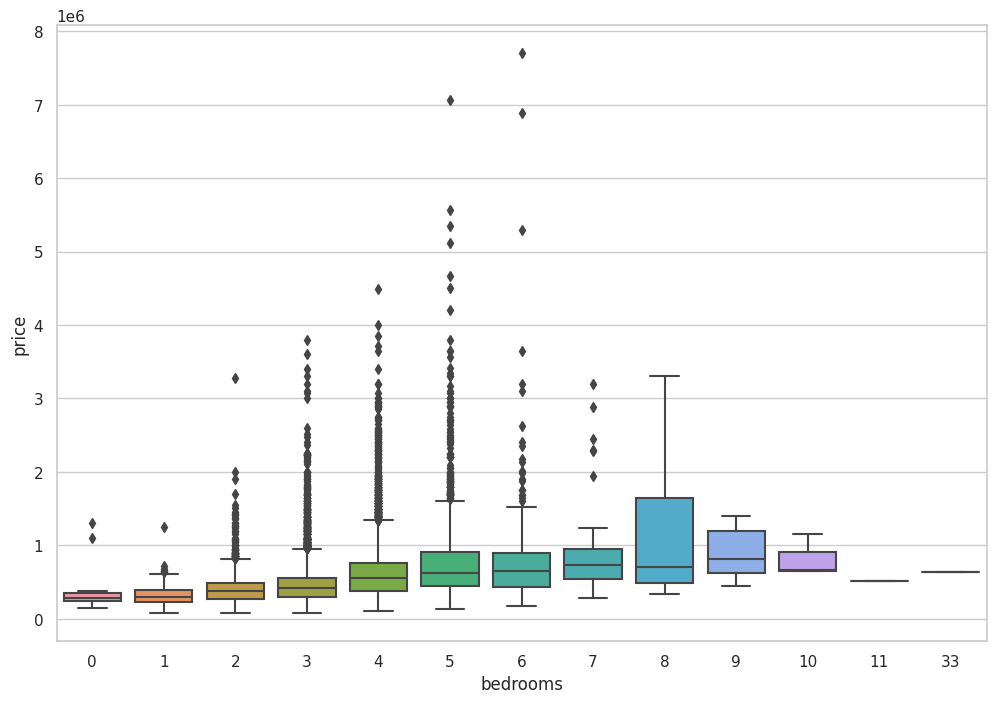

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(x='bedrooms',y='price',data=df1)

<Axes: xlabel='floors', ylabel='count'>

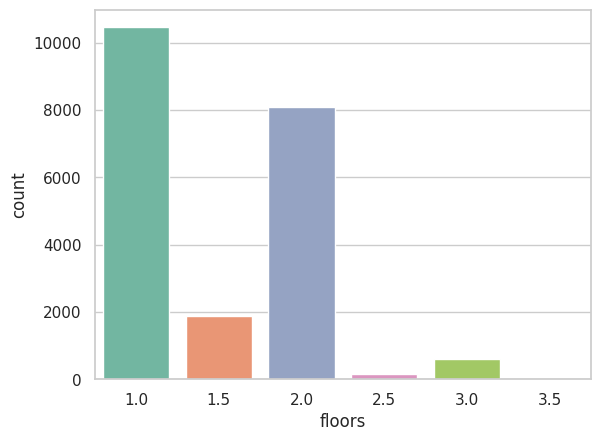

In [ ]:
sns.countplot(x='floors',data=df1, palette='Set2')

<Axes: xlabel='sqft_living', ylabel='price'>

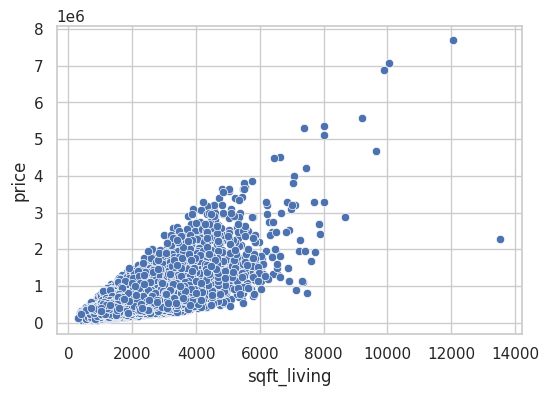

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='sqft_living',y='price',data=df1)

<Axes: xlabel='sqft_lot', ylabel='price'>

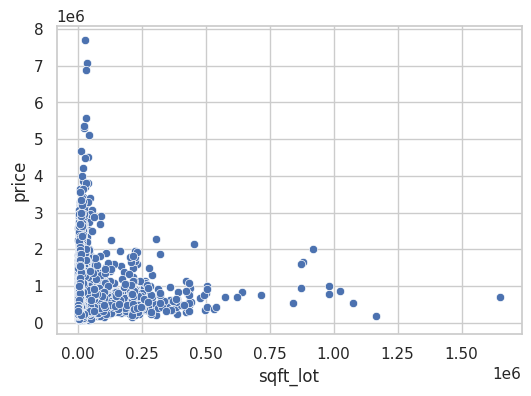

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='sqft_lot',y='price',data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

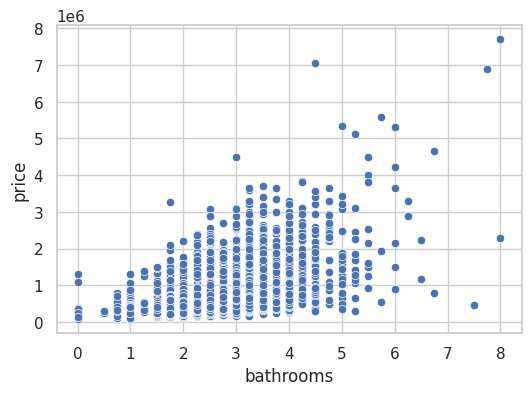

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='bathrooms',y='price',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

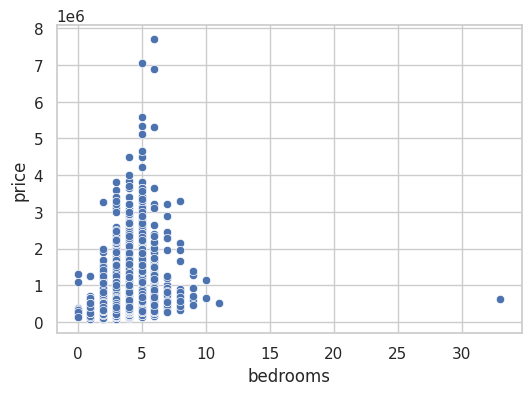

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='grade', ylabel='price'>

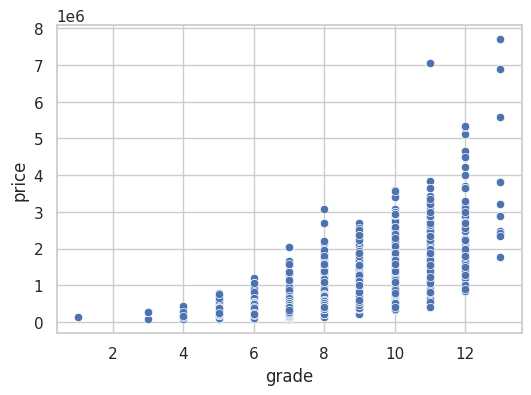

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='grade',y='price',data=df)

<Axes: xlabel='condition', ylabel='price'>

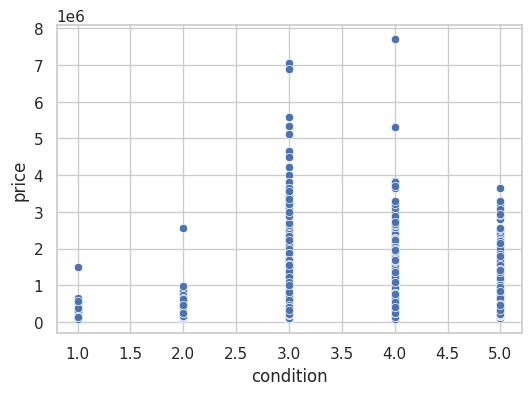

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='condition',y='price',data=df)

<Axes: xlabel='floors', ylabel='price'>

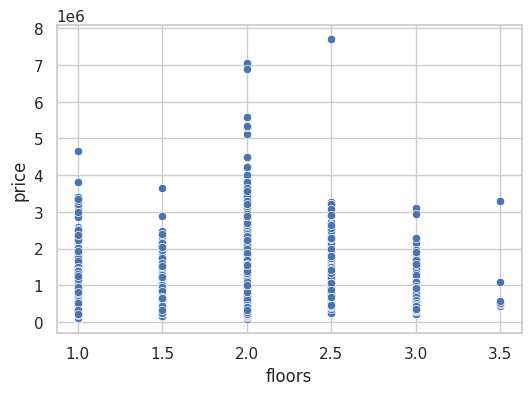

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x='floors',y='price',data=df)

In [ ]:
# Finding out the correlation between the features
corr = df1.corr()
corr.shape

(20, 20)

<Axes: >

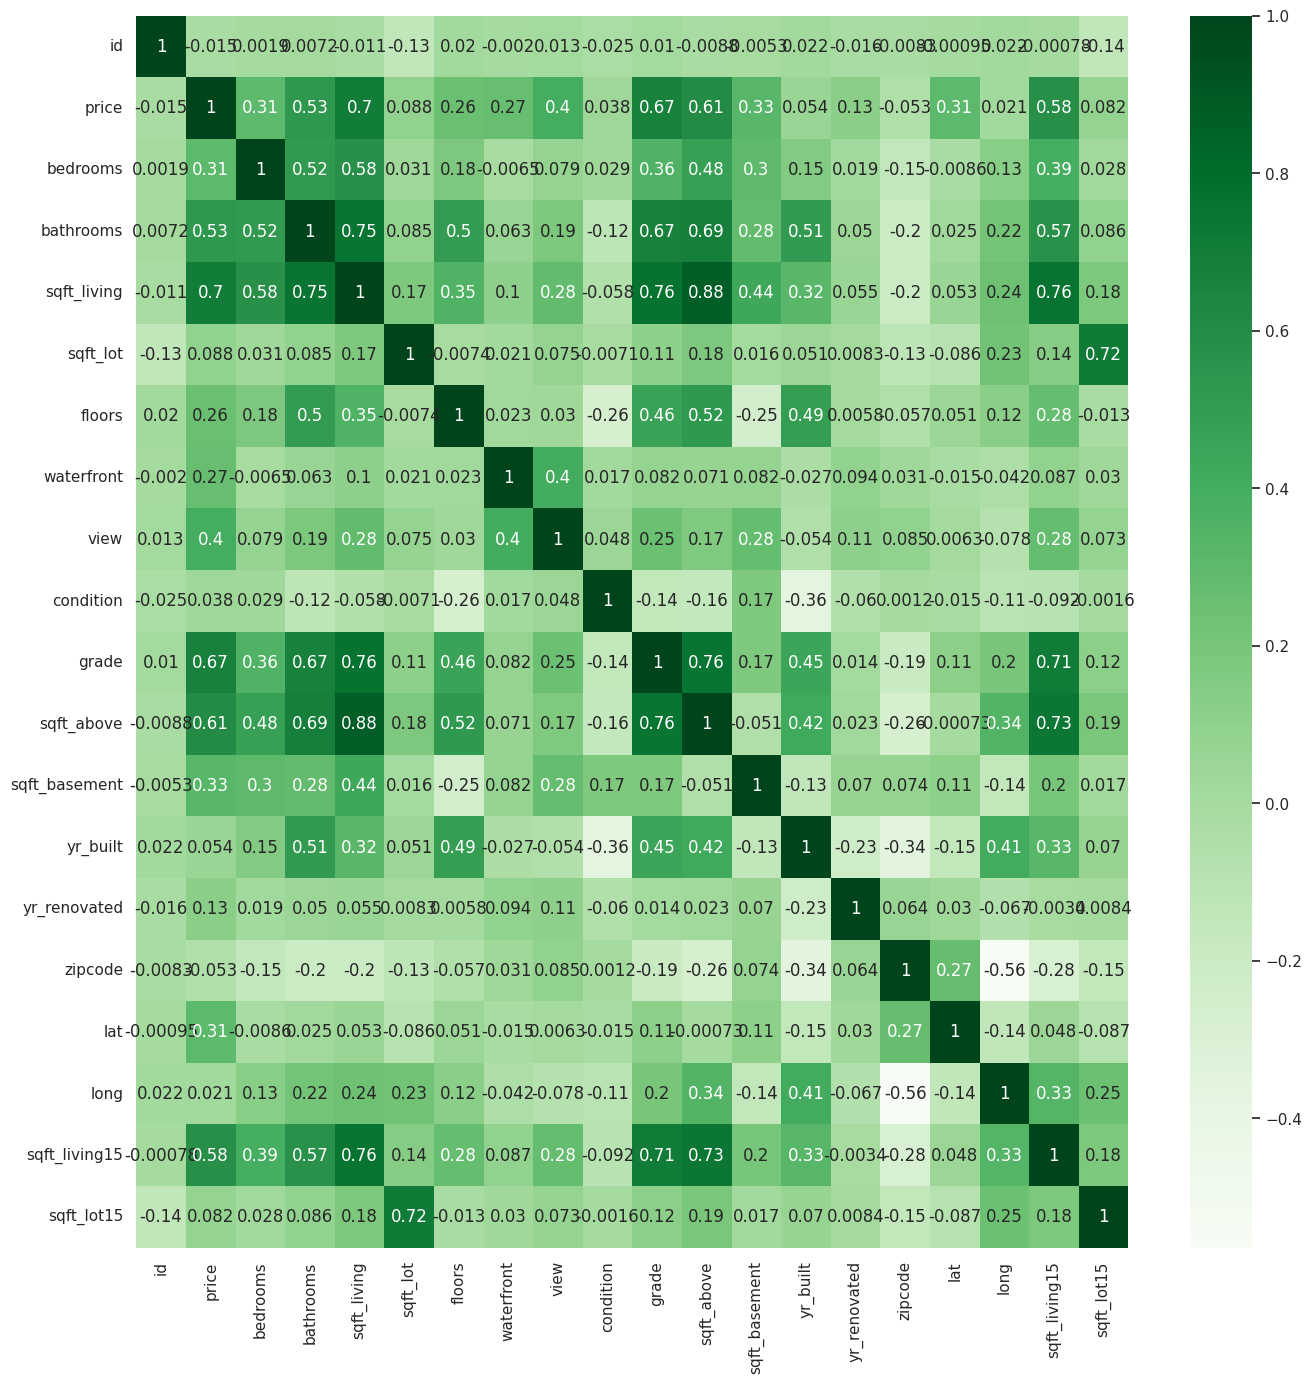

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True, cmap='Greens')

In [ ]:
# Two ways for visualizing the missing values
df1.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

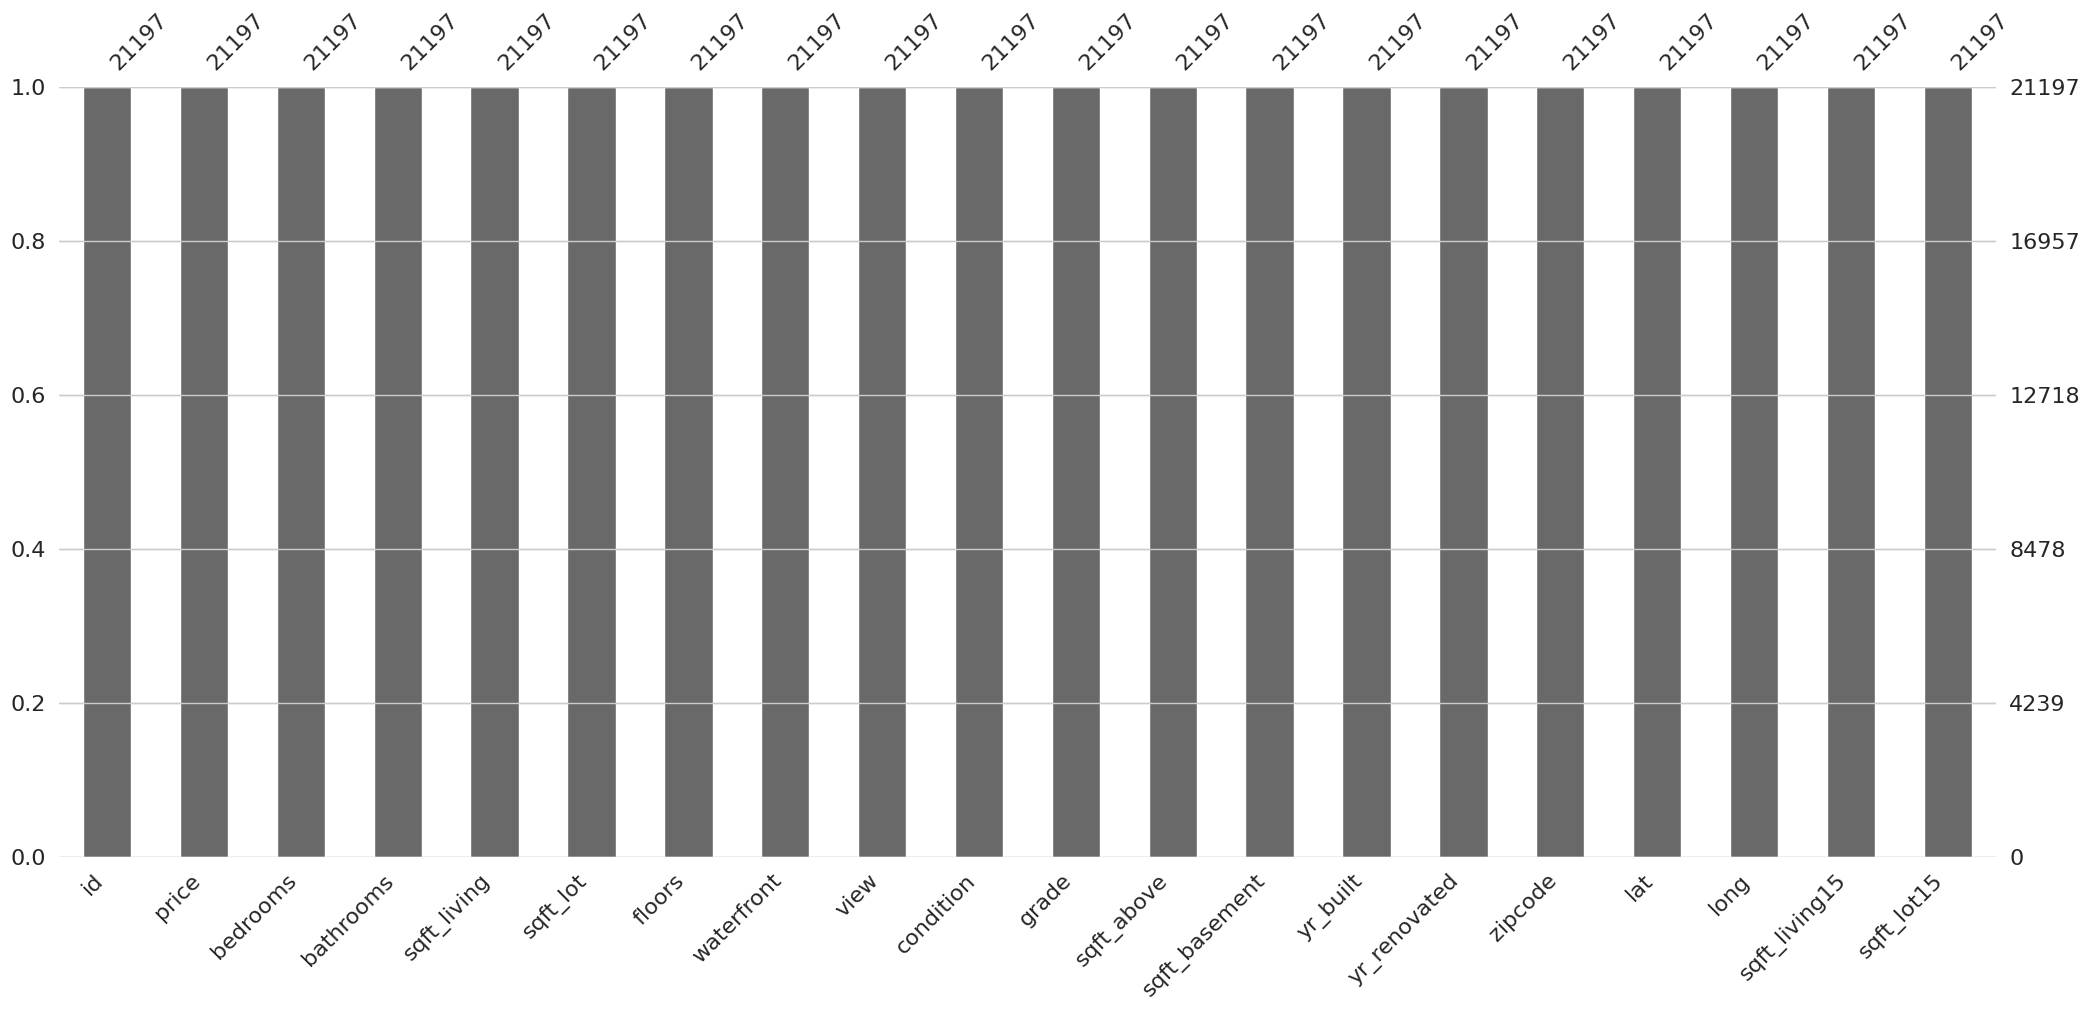

In [ ]:
#msno is a library with chart bars
msno.bar(df1)

In [ ]:
# Time for Outliers and duplicates
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21192    False
21193    False
21194    False
21195    False
21196    False
Length: 21197, dtype: bool

In [ ]:
#This will contain dataframe of rows from original dataframe(df) where there a dublicates in df1
df[df1.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,20141016T000000,550000.0,4,1.75,2410,8447,2.0,0,3,...,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14567,6308000010,20150423T000000,585000.0,3,2.50,2290,5089,2.0,0,0,...,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
19638,8648900110,20140826T000000,555000.0,3,2.50,1940,3211,2.0,0,0,...,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [ ]:
# Now removing the dublicates from df1
TheDublicated_Removed = df1.drop_duplicates()

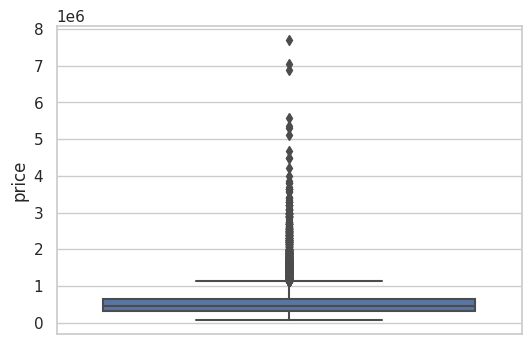

In [ ]:
# creating boxplots to see the outliers in the price variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df1['price']).set_title
plt.show()

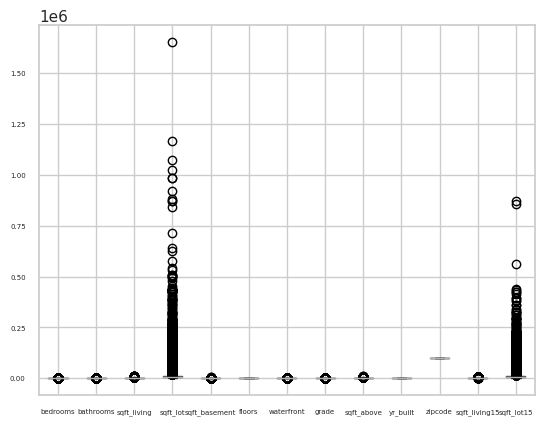

In [ ]:
# see the outliers in the all features

df_columns=['bedrooms', 'bathrooms','sqft_living','sqft_lot','sqft_basement','floors','waterfront','grade','sqft_above','yr_built','zipcode','sqft_living15' ,'sqft_lot15']

boxplot =df1.boxplot(column=df_columns, grid=True, fontsize=5)

In [ ]:
q1 = df1[df_columns].quantile(0.25)
q3 = df1[df_columns].quantile(0.75)
Outliers_IQR = q3-q1
print("This is the outliers for all features")
((df1 < (q1 - 1.5 * Outliers_IQR )) | (df1> (q3 + 1.5 * Outliers_IQR ))).sum()

This is the outliers for all features


<ipython-input-65-61cbcb958f2e>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df1 < (q1 - 1.5 * Outliers_IQR )) | (df1> (q3 + 1.5 * Outliers_IQR ))).sum()


bathrooms         561
bedrooms          541
condition           0
floors              0
grade            1871
id                  0
lat                 0
long                0
price               0
sqft_above        601
sqft_basement     490
sqft_living       566
sqft_living15     514
sqft_lot         2387
sqft_lot15       2160
view                0
waterfront        162
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64

In [ ]:
# Upper and Lower limits
max_limit = q3 + (1.5 * Outliers_IQR)
min_limit = q1 - (1.5 * Outliers_IQR)

In [ ]:
for col in df1.columns:
    if df1[col].dtypes != 'object':
        df1[df_columns] = np.where(df1[df_columns]>max_limit,df1[df_columns].mean(),np.where(df1[df_columns]<min_limit,df1[df_columns].mean(),df1[df_columns]))

In [ ]:
print("the count of outliers for all features")
((df1 < (q1 - 1.5 * Outliers_IQR)) | (df1> (q3 + 1.5 * Outliers_IQR))).sum()

the count of outliers for all features


<ipython-input-68-b7f0fcdeb5eb>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df1 < (q1 - 1.5 * Outliers_IQR)) | (df1> (q3 + 1.5 * Outliers_IQR))).sum()


bathrooms          0
bedrooms           0
condition          0
floors             0
grade              0
id                 0
lat                0
long               0
price              0
sqft_above         0
sqft_basement      0
sqft_living        0
sqft_living15      0
sqft_lot           0
sqft_lot15         0
view               0
waterfront       162
yr_built           0
yr_renovated       0
zipcode            0
dtype: int64

In [ ]:
# apply transformation
df_transform = df1.copy()
df_transform['log'] =df_transform['price'].transform(np.log10)
display(df_transform)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3,...,1180.0,0.0,1955.0,0,98178.0,47.5112,-122.257,1340.0,5650.0,5.346157
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3,...,2170.0,400.0,1951.0,1991,98125.0,47.7210,-122.319,1690.0,7639.0,5.730782
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3,...,770.0,0.0,1933.0,0,98028.0,47.7379,-122.233,2720.0,8062.0,5.255273
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5,...,1050.0,910.0,1965.0,0,98136.0,47.5208,-122.393,1360.0,5000.0,5.781037
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3,...,1680.0,0.0,1987.0,0,98074.0,47.6168,-122.045,1800.0,7503.0,5.707570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21192,263000018,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0,3,...,1530.0,0.0,2009.0,0,98103.0,47.6993,-122.346,1530.0,1509.0,5.556303
21193,6600060120,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0,3,...,2310.0,0.0,2014.0,0,98146.0,47.5107,-122.362,1830.0,7200.0,5.602060
21194,1523300141,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0,3,...,1020.0,0.0,2009.0,0,98144.0,47.5944,-122.299,1020.0,2007.0,5.604335
21195,291310100,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0,3,...,1600.0,0.0,2004.0,0,98027.0,47.5345,-122.069,1410.0,1287.0,5.602060


In [ ]:
# Data imbalancing by using RandomOverSampler
from sklearn.preprocessing import LabelEncoder  # encode categorical labels if there is to numeric form
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
s=RandomOverSampler()
x_data,y_data=s.fit_resample(x,y)
print(Counter(y_data))

Counter({5650: 422, 7639: 422, 8062: 422, 5000: 422, 7503: 422, 101930: 422, 6819: 422, 9711: 422, 8113: 422, 7570: 422, 8925: 422, 6000: 422, 12697: 422, 10208: 422, 4850: 422, 4000: 422, 14018: 422, 4300: 422, 5095: 422, 8850: 422, 4980: 422, 20336: 422, 7005: 422, 8386: 422, 6865: 422, 4705: 422, 3573: 422, 3861: 422, 6235: 422, 6026: 422, 3980: 422, 1756: 422, 5080: 422, 8720: 422, 3264: 422, 11467: 422, 4700: 422, 7800: 422, 11884: 422, 5669: 422, 30617: 422, 5639: 422, 2640: 422, 8808: 422, 9232: 422, 8840: 422, 13685: 422, 5100: 422, 72513: 422, 9364: 422, 9133: 422, 4080: 422, 6738: 422, 4500: 422, 4750: 422, 11044: 422, 8542: 422, 18900: 422, 8750: 422, 9500: 422, 3090: 422, 11049: 422, 4557: 422, 12635: 422, 20158: 422, 38917: 422, 4745: 422, 7807: 422, 50529: 422, 35020: 422, 7500: 422, 5060: 422, 5693: 422, 39750: 422, 5363: 422, 6405: 422, 6720: 422, 8797: 422, 7203: 422, 4800: 422, 8165: 422, 7349: 422, 2025: 422, 1106: 422, 7510: 422, 6250: 422, 10500: 422, 6045: 422, 15

In [ ]:
#Normalization

from sklearn.preprocessing import MinMaxScaler
M=MinMaxScaler()
scaled=M.fit_transform(x_data)
scaled

array([[0.72010308, 0.01926557, 0.09090909, ..., 0.57149751, 0.21760797,
        0.16193426],
       [0.64785332, 0.06072131, 0.09090909, ..., 0.90895931, 0.16611296,
        0.22216486],
       [0.56879485, 0.01377049, 0.06060606, ..., 0.93614283, 0.23754153,
        0.3994149 ],
       ...,
       [0.02263652, 0.11311475, 0.12121212, ..., 0.83657713, 0.52906977,
        0.5198761 ],
       [0.02263652, 0.11311475, 0.12121212, ..., 0.83657713, 0.52906977,
        0.5198761 ],
       [0.02263652, 0.11311475, 0.12121212, ..., 0.83657713, 0.52906977,
        0.5198761 ]])

In [ ]:
x_train=df1.drop(['price'],axis=1)
print(x_train)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520       3.0       1.00       1180.0    5650.0     1.0   
1      6414100192       3.0       2.25       2570.0    7242.0     2.0   
2      5631500400       2.0       1.00        770.0   10000.0     1.0   
3      2487200875       4.0       3.00       1960.0    5000.0     1.0   
4      1954400510       3.0       2.00       1680.0    8080.0     1.0   
...           ...       ...        ...          ...       ...     ...   
21192   263000018       3.0       2.50       1530.0    1131.0     3.0   
21193  6600060120       4.0       2.50       2310.0    5813.0     2.0   
21194  1523300141       2.0       0.75       1020.0    1350.0     2.0   
21195   291310100       3.0       2.50       1600.0    2388.0     2.0   
21196  1523300157       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0     0          3    7.0      1180

In [ ]:
y_train=df1['price']
print(y_train)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21192    360000.0
21193    400000.0
21194    402101.0
21195    400000.0
21196    325000.0
Name: price, Length: 21197, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train, test_size= 0.3,random_state=40)

In [ ]:
# Ridge Regression
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.1359e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [ ]:
y_pred = model.predict(x_test)

model score :  0.46961721936604195
[-4.22877459e-07  1.15277160e+04  2.77036325e+04  5.28983949e+01
  9.49775277e+00  1.13431632e+05  2.78819861e-35  1.33617308e+05
  2.88095089e+04  2.17699891e+04  5.61013066e+01  5.97458967e+01
 -1.35603151e+03  5.46216322e+01 -7.87104036e+02  7.75410690e+05
 -2.53937354e+05  7.66892042e+01 -9.12752352e-01]


<ipython-input-81-6f0cb8f59b34>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(model.coef_, use_line_collection=True)


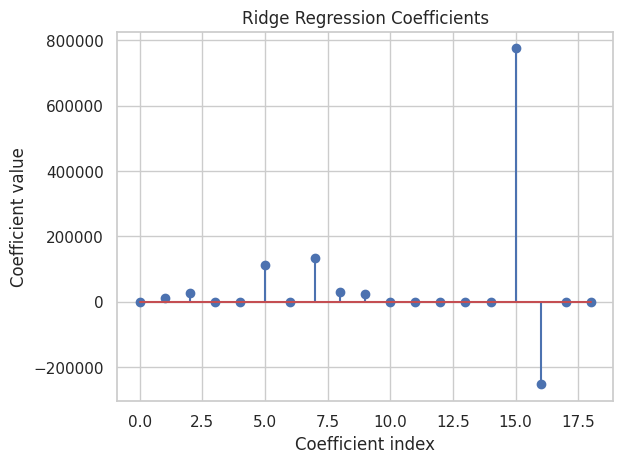

In [ ]:
# Evaluation
score = model.score(x_test, y_test)
print("model score : ",model.score(x_test,y_test))

print(model.coef_)

# Plot the coefficient values
fig, ax = plt.subplots()
ax.stem(model.coef_, use_line_collection=True)
ax.set_xlabel('Coefficient index')
ax.set_ylabel('Coefficient value')
ax.set_title('Ridge Regression Coefficients')
plt.show()

In [ ]:
# hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=['neg_mean_squared_error','r2'],refit='r2' ,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0125e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0096e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0208e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02174e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: 

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [ ]:
#best model
print(grid_search.best_estimator_)

Ridge(alpha=0.1)


In [ ]:
print(grid_search.best_params_)

{'alpha': 0.1}


In [ ]:
from sklearn.metrics import r2_score

r2_sco = r2_score(y_test, y_pred) * 100
print("R-squared score:", r2_sco)


R-squared score: 46.96172193660419


In [ ]:
# kc_house_data_test_hidden
df2=pd.read_csv('/content/drive/MyDrive/Datasets/kc_house_data_test_hidden.csv')

In [ ]:
df2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6206100030,20150501T000000,3,1.00,980,10960,1.0,0,0,4,7,980,0,1953,0,98005,47.5908,-122.173,2100,10960
1,7888300340,20141124T000000,3,1.00,1730,7950,1.0,0,0,4,7,1180,550,1961,0,98198,47.3644,-122.312,1830,8890
2,1180000885,20141030T000000,3,2.50,3070,5871,3.0,0,0,4,8,2510,560,1928,0,98178,47.5007,-122.223,2220,4000
3,1081330060,20140813T000000,4,2.25,2100,12738,2.0,0,0,4,8,2100,0,1975,0,98059,47.4698,-122.118,2000,12090
4,9536600105,20150109T000000,3,2.75,2080,16740,1.0,0,3,3,8,1580,500,1966,0,98198,47.3632,-122.324,2175,7568


In [ ]:
df21=df2.drop(columns = ['date'])
df21

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6206100030,3,1.00,980,10960,1.0,0,0,4,7,980,0,1953,0,98005,47.5908,-122.173,2100,10960
1,7888300340,3,1.00,1730,7950,1.0,0,0,4,7,1180,550,1961,0,98198,47.3644,-122.312,1830,8890
2,1180000885,3,2.50,3070,5871,3.0,0,0,4,8,2510,560,1928,0,98178,47.5007,-122.223,2220,4000
3,1081330060,4,2.25,2100,12738,2.0,0,0,4,8,2100,0,1975,0,98059,47.4698,-122.118,2000,12090
4,9536600105,3,2.75,2080,16740,1.0,0,3,3,8,1580,500,1966,0,98198,47.3632,-122.324,2175,7568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,3066400710,3,2.50,2520,10012,2.0,0,0,3,10,2520,0,1987,0,98074,47.6295,-122.051,2680,10071
412,795000765,2,1.00,760,5500,1.5,0,0,3,5,760,0,1947,0,98168,47.5045,-122.329,1040,5515
413,2767603535,3,1.75,1310,5000,2.0,0,0,4,7,1310,0,1901,0,98107,47.6722,-122.379,1270,4750
414,7774200070,4,2.50,2750,13950,1.0,0,3,4,8,1380,1370,1948,0,98146,47.4938,-122.364,2460,13950


[ 4.40075499e+05  1.72698493e+05  7.70025522e+05  5.73740307e+05
  7.58749168e+05  5.91781096e+05  5.32010797e+05  9.24040514e+05
  4.50142219e+05  4.97930463e+05  4.41923417e+05  4.35496909e+05
  5.42149714e+05  4.41288280e+05  4.23035873e+05  2.15937388e+06
  5.06535549e+05  2.17598395e+05  1.00826429e+06  5.96040972e+05
  1.07495652e+06  6.75189293e+05  4.14999703e+05  5.01705588e+05
  1.12086768e+06  4.80525028e+05  9.00206767e+05  2.01077902e+06
  3.42174559e+05  2.13503119e+05  6.98811576e+05  5.46764867e+05
  8.30061565e+05  5.44049413e+05  6.63940859e+05  5.85563376e+05
  5.13729667e+05  8.25118300e+05  4.45806650e+05  1.00306517e+05
  3.70106974e+05  4.13043239e+05  3.80757457e+05  6.41192357e+05
  3.25608050e+05  5.38144537e+05  9.65512050e+05  1.02384563e+06
  6.27512705e+05  9.63278406e+05  3.30451878e+05  1.88091922e+05
  5.15637816e+05  2.20257001e+05  5.03361595e+05  2.90542686e+06
  1.78577627e+05  4.45945619e+05  9.69515595e+05  4.67604657e+05
  3.27427579e+05  5.17740

Text(0, 0.5, 'prediction Value ')

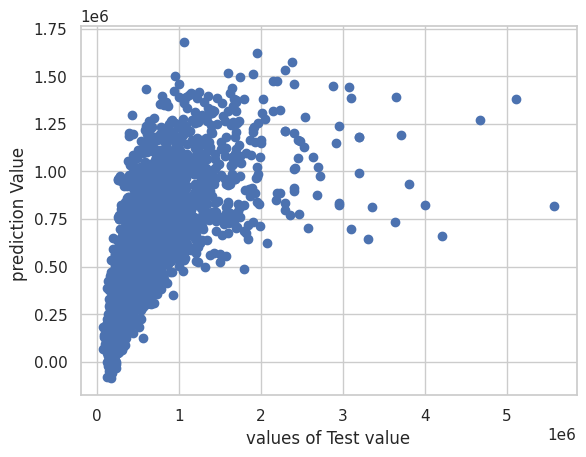

In [ ]:
pred=model.predict(df21)
print(pred)
plt.scatter(y_test,y_pred)

plt.xlabel("values of Test value")
plt.ylabel('prediction Value ')

In [ ]:
pred=pd.DataFrame(pred)
pred

,0
0,4.400755e+05
1,1.726985e+05
2,7.700255e+05
3,5.737403e+05
4,7.587492e+05
...,...
411,7.356504e+05
412,1.155786e+05
413,6.027769e+05
414,1.035403e+06


In [ ]:
pred.to_csv('prediction_Ahmed_Ramy.cvs',index=False)